In [2]:
import numpy as np
import scipy as sp
import datajoint as dj

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import signal

from pipeline import lab, experiment, ephys, histology, ccf
from pipeline.plot import histology_plot

Connecting thinh@mesoscale-activity.datajoint.io:3306


In [18]:
import warnings
warnings.filterwarnings('ignore')

# Visualization of Probe Track

Here we introduces an built-in function for generating a 3D plot of brain surface and probe tracks, on a per session basis:

`histology_plot.plot_probe_tracks(session_key)`
  

#### First, let's query all sessions with histology data available

In [15]:
experiment.Session * histology.LabeledProbeTrack

subject_id institution 6 digit animal ID,session session number,insertion_number,session_date,session_time,username,rig,labeling_date,dye_color
412330,64,1,2018-07-16,15:46:24,daveliu,RRig,None,None
412330,64,2,2018-07-16,15:46:24,daveliu,RRig,None,None
413950,120,1,2018-10-22,10:47:29,daveliu,RRig,None,None
413950,120,2,2018-10-22,10:47:29,daveliu,RRig,None,None
413950,121,1,2018-10-23,10:52:16,daveliu,RRig,None,None
413950,121,2,2018-10-23,10:52:16,daveliu,RRig,None,None
432570,13,1,2018-10-22,14:06:50,daveliu,RRig,None,None


#### Now, pick one session from above

In [16]:
session_key = {'subject_id': 412330, 'session': 64}

#### Call the plotting function

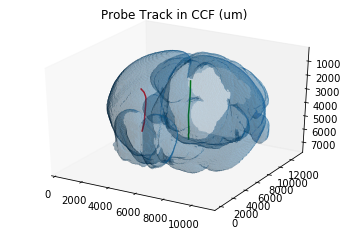

In [19]:
histology_plot.plot_probe_tracks(session_key);

# Advanced - Better interactive 3D plot - requires k3d

This section utilizes `k3d` package for Jupyter Notebook to generate a 3D interactive plot version of the above plot.

In [20]:
import k3d

In [21]:
um_per_px = 20
# fetch mesh
vertices, faces = (ccf.AnnotatedBrainSurface
                   & 'annotated_brain_name = "Annotation_new_10_ds222_16bit_isosurf"').fetch1(
    'vertices', 'faces')
vertices = vertices * um_per_px

In [22]:
probe_tracks = {}
for probe_insert in (ephys.ProbeInsertion & session_key).fetch('KEY'):
    x, y, z = (histology.LabeledProbeTrack.Point & probe_insert).fetch(
        'ccf_x', 'ccf_z', 'ccf_y', order_by='"order"')
    probe_tracks[probe_insert['insertion_number']] = np.vstack(zip(*(x, y, z)))

In [23]:
plot = k3d.plot(background_color = 1, grid_visible = False, height=400)

In [24]:
mesh = k3d.mesh(vertices, faces, opacity=0.25, color=16777215)

In [25]:
colors = [16711684, 65284, 15662848, 3932415]  # r, g, y, b
for (k, v), c in zip(probe_tracks.items(), colors):
    plot += k3d.line(v, color=c, width=0.5)

In [26]:
plot += mesh

In [27]:
plot.display()

Output()